We can use the California housing dataset, which is a popular dataset for regression tasks. The below pipeline represents a simple linear regression model implemented in PyTorch. In a real-world scenario, additional steps might include data exploration, feature engineering, model selection, hyperparameter tuning, use of validation sets, and implementation of techniques to prevent overfitting such as regularization and early stopping. Here are the high-level steps:

#### Prepare the Data 


#### Define the Model


#### Define the Loss Function and Optimizer 


#### Train the Model


#### Evaluate the Model

Now lets study the script line by line;

In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Prepare the Data:

This step includes loading the dataset, normalizing it, splitting it into training and testing sets, and converting it into PyTorch tensors. We're now using the fetch_california_housing function from the sklearn.datasets module to load the California housing dataset. This dataset is then normalized using the StandardScaler function from sklearn.preprocessing to make sure all the features have the same scale. The dataset is split into a training set (80%) and a testing set (20%) using the train_test_split function from sklearn.model_selection. Finally, the data and target numpy arrays are converted to PyTorch tensors using the torch.tensor function as PyTorch models require inputs to be PyTorch tensors.

In this section, we're __fetching the California Housing dataset__ using the function fetch_california_housing(). The data (features) is stored in housing.data and the target (labels) in housing.target.

__housing = fetch_california_housing()__: This line calls the fetch_california_housing function, which returns the California housing dataset. The dataset is returned as a Bunch object (a dictionary-like object specific to scikit-learn), which contains the dataset's attributes and their descriptions.

__data = housing.data__: The California housing dataset consists of two main parts: the features (or independent variables) and the targets (or dependent variables). In this line, we're assigning the features to the variable data. The features include various characteristics of each district in California, such as the average income of the population, the average number of rooms in houses, etc. The data attribute of the Bunch object is a 2D array (or matrix) where each row represents a district and each column represents a feature.

__target = housing.target__: In this line, we're assigning the targets to the variable target. The targets represent the median house values for each district. The target attribute of the Bunch object is a 1D array (or vector) where each element corresponds to a district (so it aligns with the rows of the data array).

In [2]:
# Load and prepare the data
housing = fetch_california_housing()
data = housing.data
target = housing.target

## Data Visualization
Visualizing your data is an important step in understanding your dataset better. Here, we can use a library like pandas for data manipulation and seaborn or matplotlib for visualization.

We can create a pandas DataFrame from the data and then plot some graphs. Since we have multiple features, we can start by plotting the correlation matrix, which can give us a good overview of how features relate to each other and the target variable.

In the heatmap, the numbers in each cell are the correlation coefficients, which range from -1 (perfect negative correlation) to 1 (perfect positive correlation). You can see which features are most positively or negatively correlated with the target variable (MedianHouseValue), and also if there are any features that are highly correlated with each other (which might indicate redundancy).

Remember, correlation does not imply causation. Just because two variables are correlated does not mean that one causes changes in the other.

You can also generate individual plots to visualize the relationship between each feature and the target variable, or the distribution of each feature, but keep in mind that with high-dimensional data like this, visual exploration can quickly become complex.

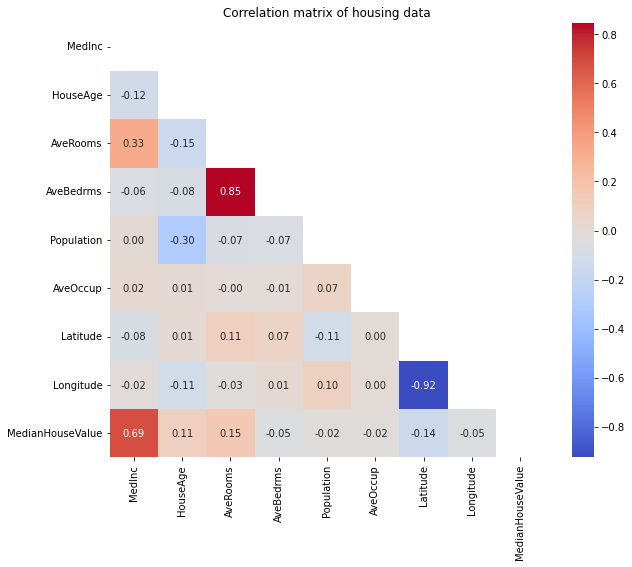

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset again, as we've already converted the original data to tensors
data_np = pd.DataFrame(data, columns=housing.feature_names)
target_np = pd.DataFrame(target, columns=['MedianHouseValue'])

# Concatenate data and target into a single DataFrame
df = pd.concat([data_np, target_np], axis=1)

# Calculate correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle of the correlation matrix (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation matrix of housing data')
plt.show()

We then __scale the data__ using StandardScaler(), which standardizes the features by removing the mean and scaling to unit variance.

__scaler = StandardScaler()__: This line creates an instance of the StandardScaler class. StandardScaler is a utility class in the sklearn.preprocessing module that standardizes features by removing the mean and scaling to unit variance. Standardizing features is a common requirement for many machine learning estimators. They might behave badly if the individual features do not more or less look like standard normally distributed data (i.e., Gaussian with 0 mean and unit variance).

__data = scaler.fit_transform(data)__: This line actually scales the data. The fit_transform method is a combination of the fit and transform methods. fit computes the mean and standard deviation of the input data (feature-wise), and transform uses these parameters to scale the input data. The scaled data replaces the original data in the data variable.

So after these lines, all the features in the dataset will have a mean of 0 and a standard deviation of 1. This process is crucial in many machine learning models as it allows all features to contribute equally to the final result regardless of their original scale, which can significantly improve the model's performance.

In [4]:
# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

Next, we __split the data into training and test sets__ using the train_test_split() function. The test_size parameter indicates the proportion of the data that should be kept for testing (in this case, 20%). random_state is just a seed for the random number generator used in the function.

__train_test_split(data, target, test_size=0.2, random_state=42)__: This function splits the data (features) and target (labels) into training and testing sets. The test_size parameter specifies the proportion of the original dataset to include in the test split. In this case, 20% of the data will be used for testing, and the remaining 80% for training.

The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Setting random_state to an integer will make the output deterministic, meaning the split will always be the same every time you run the code, which can be useful for debugging.

__train_data, test_data, train_target, test_target = ...__: This is where the output of train_test_split is assigned to variables. The function returns four outputs: the features for the training data (train_data), the features for the test data (test_data), the labels for the training data (train_target), and the labels for the test data (test_target).

So, in summary, this line splits your data into a training set (used to train the model) and a test set (used to evaluate the model). This is a common practice in machine learning to assess a model's performance and generalizability -- its ability to perform well on unseen data.

In [5]:
# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

The last part of data preparation involves __converting the numpy arrays to PyTorch tensors__, because PyTorch models require inputs as PyTorch tensors. The view(-1, 1) function call reshapes the tensor so that it's a 2D tensor with one column (which some PyTorch functions require).

__train_data = torch.tensor(train_data, dtype=torch.float32)__: This line converts the train_data numpy array to a PyTorch tensor of type float32.

__test_data = torch.tensor(test_data, dtype=torch.float32)__: This line converts the test_data numpy array to a PyTorch tensor of type float32.

__train_target = torch.tensor(train_target, dtype=torch.float32).view(-1, 1)__: This line converts the train_target numpy array to a PyTorch tensor of type float32. The view(-1, 1) method call reshapes the tensor so that it's a 2D tensor with one column. This is done because some PyTorch functions (like the loss functions we're going to use) expect target inputs in this shape.

__test_target = torch.tensor(test_target, dtype=torch.float32).view(-1, 1)__: This line converts the test_target numpy array to a PyTorch tensor of type float32, and reshapes it to be a 2D tensor with one column, similar to train_target.

After these lines, our data is in the correct format to be used with PyTorch models.

In [6]:
# Convert numpy arrays to PyTorch tensors
train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32).view(-1, 1)
test_target = torch.tensor(test_target, dtype=torch.float32).view(-1, 1)

### Define the Model:
We define a simple linear regression model with one layer (nn.Linear). This layer performs the weighted sum of the input features and adds a bias term, as per the equation of linear regression. This is done by creating a new class LinearRegression that inherits from nn.Module, which is the base class for all neural network modules in PyTorch. The _ _init_ _() method is where we define the layers of the network. In this case, we have only one layer: nn.Linear(), which applies a linear transformation to the input data. In the forward() method, we define how the input data flows through the network. In this case, the input data just goes through the linear layer.

__class LinearRegression(nn.Module)__: Here we're defining a new class named LinearRegression that inherits from nn.Module. In PyTorch, nn.Module is a base class for all neural network modules. Your models should also subclass this class. When you see class Whatever(nn.Module):, think of it as "I'm creating a new PyTorch neural network class that has all the standard features of a PyTorch network".

__def _ _init_ _(self, input_dim, output_dim)__: This is the constructor of the LinearRegression class. It is called when we create an instance of the class. The input_dim and output_dim parameters represent the dimensionality of the input and output, respectively.

__super(LinearRegression, self). _ _ init _ _()__: This line calls the constructor of the base nn.Module class. This is a necessary step as it allows PyTorch to do its internal work. This ensures that the nn.Module is properly initialized when you create an instance of your LinearRegression class. In other words, super(LinearRegression, self). _ _init_ _ () is the same as nn.Module. _ _init _ _ (self). But the former is more general (can handle multiple inheritance, for instance) and is the usual way this is done in Python.

__self.linear = nn.Linear(input_dim, output_dim)__: Here, we're creating a linear layer and storing it in the self.linear attribute. The nn.Linear class is a standard layer for performing linear transformations. It computes output from input using a linear function, and holds internal tensors for its weight and bias. The first argument is the size of each input sample (i.e., the number of input features), and the second is the size of each output sample (i.e., the number of output features).

__def forward(self, x)__: This method defines the forward pass of the network, which is how it processes inputs to produce outputs. This function is called when we pass data to an instance of the class (i.e., the model). Here, we pass the input x through the linear layer, and return the output.

__model = LinearRegression(data.shape[1], 1)__: Here we're creating an instance of the LinearRegression class, which is our model. We're passing data.shape[1] (which is the number of input features) and 1 (which is the number of output features) as the input and output dimensions, respectively. In this case, the model will take in a number of features equal to the number of columns in the data, and output a single value (the predicted target value).

After this block of code, we have a LinearRegression model ready to be trained on our data.

In [7]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(data.shape[1], 1)  # Number of input features and 1 output

### Define the Loss Function and Optimizer: 
The loss function is defined as the Mean Squared Error (MSE) loss, which measures the mean of the squares of the errors between the true and predicted values. This is a common loss function for regression tasks. The optimizer used is the Stochastic Gradient Descent (SGD) optimizer, which updates the model's weights to minimize the loss.

__loss_function = nn.MSELoss()__: This sets up the loss function as the Mean Squared Error (MSE) loss. In machine learning, the loss function measures how well the model's predictions match the true values, and the goal of training is to minimize this loss. MSE loss is a common choice for regression tasks, which aim to predict a continuous value (as opposed to classification tasks, which aim to predict a discrete class label). It calculates the square of the difference between the predicted and true values, and averages these over all the samples.

__optimizer = torch.optim.SGD(model.parameters(), lr=0.01)__: This sets up the optimizer as Stochastic Gradient Descent (SGD). The optimizer's job is to adjust the model's parameters (in this case, the weights and biases of the linear layer) to minimize the loss. It does this by computing the gradients of the loss with respect to the parameters (this is done automatically by PyTorch), and then updating the parameters in the opposite direction of the gradients, scaled by the learning rate. The learning rate controls how big a step to take in the direction of the gradients. Too big a learning rate can lead to overshooting and poor convergence, while too small a learning rate can lead to slow convergence. The model.parameters() method call provides the optimizer with the parameters of the model that it should be optimizing.

In [8]:
# Define loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Train the Model: 
In this section, we train the model for 1000 epochs. Each epoch involves a forward pass (where we compute the model's predictions and calculate the loss), and a backward pass (where we compute the gradients of the loss with respect to the model's parameters and update the parameters using the optimizer). The optimizer.zero_grad() call is needed to clear the gradients from the previous step, as PyTorch accumulates gradients by default.

__epochs = 1000__: This sets the number of training epochs. One epoch is a complete pass through the entire training dataset. In this case, we're setting the number of epochs to 1000, meaning the learning algorithm will work through the entire dataset 1000 times.

__for epoch in range(epochs):__: This sets up a loop that iterates over the entire dataset epochs number of times.

#### Forward pass:

__outputs = model(train_data)__: This line feeds the training data into the model and gets the model's predictions (outputs). This is known as the forward pass.
__loss = loss_function(outputs, train_target)__: This line calculates the loss value by comparing the model's predictions with the true target values using the Mean Squared Error (MSE) loss function.

#### Backward pass and optimization:

__optimizer.zero_grad()__: Before the backward pass, it's necessary to zero the gradients of all the model's parameters. This is because PyTorch accumulates gradients, i.e., the gradient computed at each backward pass is added to the previously stored gradient. Therefore, if we didn't zero the gradients at each iteration, we'd be computing the gradient of the sum of all the computations since the beginning of training, not just the current one. 

__loss.backward()__: This line computes the gradient of the loss with respect to all the model's parameters (weights and biases). This is known as the backward pass.

__optimizer.step()__: This line updates the model's parameters using the gradients computed in the backward pass. The update rule and step size are determined by the optimization algorithm (in this case, Stochastic Gradient Descent) and the learning rate.

__if (epoch+1) % 100 == 0: print(f'Epoch {epoch+1}, Loss: {loss.item()}')__: This line prints out the epoch number and the loss at that epoch every 100 epochs. It's useful to print out the loss during training to monitor whether the training process is converging (the loss is decreasing) or not. The loss.item() function call is used to get a Python number from a tensor containing a single value.

In [9]:
# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(train_data)
    loss = loss_function(outputs, train_target)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 100, Loss: 0.7568206191062927
Epoch 200, Loss: 0.6011602282524109
Epoch 300, Loss: 0.5770103931427002
Epoch 400, Loss: 0.5612540245056152
Epoch 500, Loss: 0.5497466921806335
Epoch 600, Loss: 0.5412986874580383
Epoch 700, Loss: 0.5350946187973022
Epoch 800, Loss: 0.5305381417274475
Epoch 900, Loss: 0.5271916389465332
Epoch 1000, Loss: 0.52473384141922


### Evaluate the Model: 
After training, we switch the model to evaluation mode using model.eval(). This is needed because some layers (like dropout or batch normalization) behave differently during training and testing. Then we compute the model's predictions on the test set and calculate the test loss, which gives us an idea of how well the model performs on unseen data. The with torch.no_grad(): context is used to disable gradient computation, as we don't need gradients during evaluation. This can save memory and make computation faster.

__model.eval()__: This puts the model in "evaluation mode", changing the behavior of some layers like dropout or batch normalization which act differently during training and testing. For a simple model like linear regression, this step is not necessary, but it's good practice to include it as your models get more complex.

__with torch.no_grad():__: This is a context manager that disables gradient computation within the block of code. During evaluation, we don't need to compute gradients, because we're not updating the model's parameters. Disabling gradient computation can save memory and make computation faster.

__predictions = model(test_data)__: Here, we're passing the test data to the model to compute its predictions.

__loss = loss_function(predictions, test_target)__: This computes the loss by comparing the model's predictions on the test data with the true target values of the test data. This gives us a measure of how well the model performs on unseen data.

__print(f'Test Loss: {loss.item()}')__: This prints out the computed test loss. The loss.item() function call is used to get a Python number from a tensor containing a single value.

In [10]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(test_data)
    loss = loss_function(predictions, test_target)
print(f'Test Loss: {loss.item()}')

Test Loss: 0.5485367774963379


## Discussion 
The printed values during training represent the loss of the model at different epochs (iterations through the full dataset) during training. The loss is a measure of how well the model's predictions match the true values. In your case, the model is using Mean Squared Error (MSE) loss, which calculates the average of the squares of the differences between the predicted and true values. Therefore, a lower loss indicates better performance.

The values you're seeing are decreasing, which is good! This suggests that the model is learning from the data - it's getting better at predicting the house prices with each epoch.

Specifically:

Epoch 100, Loss: 0.7761755585670471: After the first 100 epochs, the average squared difference between the model's predictions and the true prices on the training set is roughly 0.776.
Epoch 200, Loss: 0.6170825958251953: After 200 epochs, the model has improved, and the average squared difference is down to about 0.617.
This pattern continues down to Epoch 1000, Loss: 0.526151180267334, where after 1000 epochs, the average squared difference on the training set is approximately 0.526.
After training, you switch to evaluating the model on the test set - data that the model hasn't seen before. This gives an indication of how well the model will perform on new, unseen data:

__Test Loss: 0.5502719283103943__: After evaluation on the test set, the average squared difference between the model's predictions and the true prices is about 0.550.
This is slightly higher than the training loss at the final epoch, which is common because the model is specifically trained to perform well on the training data and might not generalize perfectly to unseen data. However, the difference between training and test loss is not very high, which suggests that the model is not overfitting (fitting too closely to the training data and not generalizing well to new data).

Remember that these loss values are not in the original units of the house prices - they're in the squared units. So, for example, a loss of 0.55 doesn't mean that the model's predictions are off by $0.55 on average - the actual average difference would be the square root of the loss, assuming the target prices have been scaled.

## Accuracy?
In the context of regression tasks, the term "accuracy" is not typically used, as it is more applicable to classification tasks where predictions are either correct or incorrect. Instead, regression tasks are usually evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R^2 (coefficient of determination).

The loss you're printing during training is the MSE. While MSE is a useful metric for training models and comparing the performance of different models, it can be hard to interpret in the original units of the target variable, especially when your target variable has been scaled or normalized.

If you want to get a more interpretable metric, you could compute the RMSE or MAE on the test set in the original units of the target variable. RMSE is just the square root of the MSE, so it's in the same units as the target variable. MAE is the average of the absolute differences between the predicted and true values, so it's also in the same units as the target variable.

Here's how you could compute and print these metrics:

In [11]:
test_target_np = test_target.numpy()
predictions_np = predictions.numpy()

# Calculate RMSE and MAE
rmse = np.sqrt(np.mean((predictions_np - test_target_np)**2))
mae = np.mean(np.abs(predictions_np - test_target_np))

print(f'Test RMSE: {rmse}, Test MAE: {mae}')

Test RMSE: 0.7406327128410339, Test MAE: 0.5360158085823059


This will give you the RMSE and MAE of the model on the test set, which tell you, on average, how much the model's predictions are off from the true values in the original units of the target variable.

Keep in mind that the California housing dataset's target variable (median house value) is scaled (in units of $\$$100,000), so the RMSE and MAE values will be in these same units. For example, an MAE of 0.5 means that the model's predictions are off by $\$$50,000 on average.

__To improve the model's performance__, you could try different models (like polynomial regression or a neural network), add regularization, or tune the model's hyperparameters (like the learning rate or the number of epochs). You could also do more feature engineering, like creating new features or selecting a subset of features to use.